# Técnicas Monte Carlo

O pacote numpy vem com uma coleção completa de geradores aleatórios baseados nos melhores algoritmos:

http://docs.scipy.org/doc/numpy/reference/routines.random.html


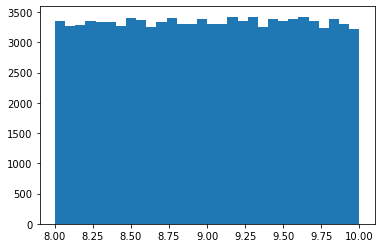

In [18]:
import numpy as np
import matplotlib.pyplot as plt


s = np.random.uniform(8,10., 100000)

count, bins, ignored = plt.hist(s, 30)

#print (count, bins, ignored)


/home/hmonteiro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


(-6.429541770069189,
 8.071193515905055,
 -10.754281096267684,
 13.426456683709024)

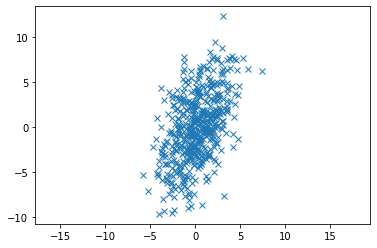

In [21]:
import numpy as np
import matplotlib.pyplot as plt

mean = [0, 0]
cov = [[1, 10], [5, 10]]  # covariancia diagonal

x, y = np.random.multivariate_normal(mean, cov, 500).T
plt.plot(x, y, 'x')
plt.axis('equal')


## Simulando jogo de dados

In [34]:
import numpy as np

p = np.random.random()

if p > 0.2:
    print ('cara', p)
else: 
    print ('coroa', p)

coroa 0.003922104396518189


## Simulando decaimento radiativo

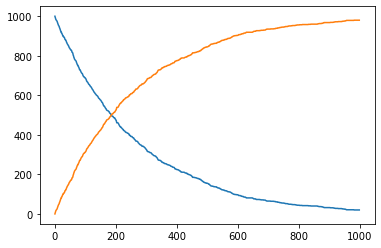

0.003776817392159071


In [37]:
NL1 = 1000
NPb = 0
tau = 3.053*60.
h = 1
tmax = 1000

p = 1 - 2**(-h/tau)

tlist = np.arange(0.,tmax,h)
Tl1list = []
Pblist = []

for t in tlist:
    Tl1list.append(NL1)
    Pblist.append(NPb)
    decay = 0
    for i in range(NL1):
        if np.random.random() < p:
            decay += 1
    NL1 -= decay
    NPb += decay
    
plt.plot(tlist,Tl1list)
plt.plot(tlist,Pblist)
plt.show()
print (p)

## Simulando um andar de bebado

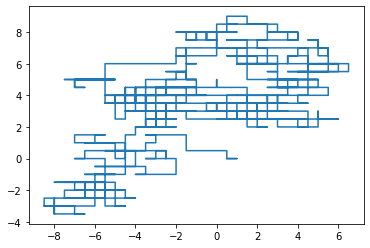

In [42]:


import numpy as np
import matplotlib.pyplot as plt

dt = 1.0 # minutos
tmax = 1200.
tempo = np.arange(0.,tmax,dt)

# ponto de partida
x0 = 0.
y0 = 0.

posicao = []
for t in tempo:
    #sorteia um numero de 0 a 1
    passo = np.random.random()
    sentido = np.random.random()
    
    if (passo < 0.5):
        if(sentido <0.5):
            posicao.append([x0+0.5,y0+0.])
            x0 += 0.5
        else:
            posicao.append([x0-0.5,y0+0.])
            x0 -= 0.5
        
    else:
        if(sentido <0.5):
            posicao.append([x0,y0+0.5])
            y0 += 0.5
        else:
            posicao.append([x0,y0-0.5])
            y0 -= 0.5
        
posicao = np.array(posicao)

plt.plot(posicao[:,0],posicao[:,1])

## Integração Monte Carlo

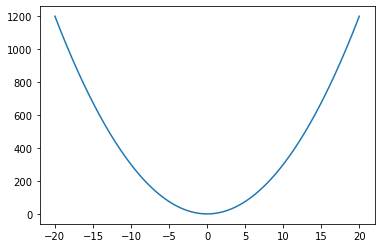

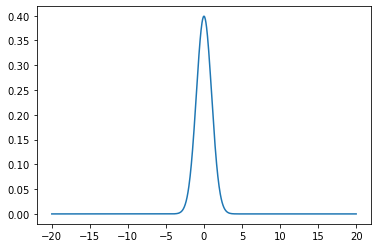

0.3 2.5 0 19.75
15.5859495
0.3 2.5 0 1.3813878154605241
0.38188742435969286
0.3 2.5 0 19.75


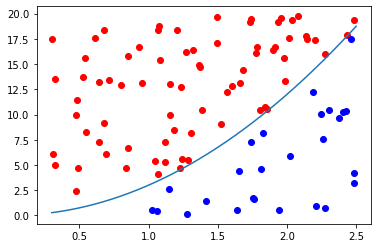

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def easy_function(x):
    return((3)*(x**2))

def hard_function(x):
    return((1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2))

X=np.linspace(-20,20,1000)
plt.plot(X,easy_function(X))
plt.show()

plt.plot(X,hard_function(X))
plt.show()

def integrate(x1,x2,func=easy_function,n=100000):
    X=np.linspace(x1,x2,1000)
    y1=0
    y2=max((func(X)))+1
    print(x1,x2,y1,y2)
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1)
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0:
            check.append(0)
        else:
            check.append(1)
    return(np.mean(check)*area,xs,ys,check)

print(integrate(0.3,2.5)[0])
print(integrate(0.3,2.5,hard_function)[0])
_,x,y,c=integrate(0.3,2.5,n=100)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

X=np.linspace(0.3,2.5,1000)
plt.plot(X,easy_function(X))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()

In [12]:
import numpy as np

np.random.seed(32)
print(np.random.random(5))
print(np.random.random(5))

print('')
np.random.seed(32)
print(np.random.random(10))


[0.85888927 0.37271115 0.55512878 0.95565655 0.7366696 ]
[0.81620514 0.10108656 0.92848807 0.60910917 0.59655344]

[0.85888927 0.37271115 0.55512878 0.95565655 0.7366696  0.81620514
 0.10108656 0.92848807 0.60910917 0.59655344]
